In [5]:
#参考：https://github.com/roryhr/taxi-trajectories

import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function that return a list of files to read in a given folder
def get_files(direc):
    full_files = []
    for root, dirs, files in os.walk(direc):
        for name in files:
            full_files.append(os.path.join(root, name))
        
    return full_files


In [5]:
#%% Read in data 

#full_files = ['data/012/15.txt']        # 1 file:      50 KB
#full_files = get_files('data/012')      # 1 folder:    30-50 MB
full_files = get_files('D:/study_2021_10/T-drive Taxi Trajectories/release/taxi_log_2008_by_id/')           # All folders: 700 MB


data = []
for index, file_path in enumerate(full_files):
    data.append(pd.read_csv(file_path, infer_datetime_format=True,\
            header=None, parse_dates = [1],\
            names = ['taxi_id', 'date_time', 'longitude', 'latitude']))

data = pd.concat(data, ignore_index=True)

print("Size of data frame: ", data.shape)
print("%.1f million rows" % (data.shape[0]/1.0e6))

# Drop duplicates and NAs 
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

Size of data frame:  (17662984, 4)
17.7 million rows


In [7]:
#保存文件
data.to_csv("D:/study_2021_10/T-drive Taxi Trajectories/release/data.csv")

In [2]:
data=pd.read_csv("D:/study_2021_10/T-drive Taxi Trajectories/release/data.csv")
data.head()

,Unnamed: 0,taxi_id,date_time,longitude,latitude
0,0,1,2008-02-02 15:36:08,116.51172,39.92123
1,1,1,2008-02-02 15:46:08,116.51135,39.93883
2,3,1,2008-02-02 15:56:08,116.51627,39.91034
3,4,1,2008-02-02 16:06:08,116.47186,39.91248
4,5,1,2008-02-02 16:16:08,116.47217,39.92498


Plotting position density...


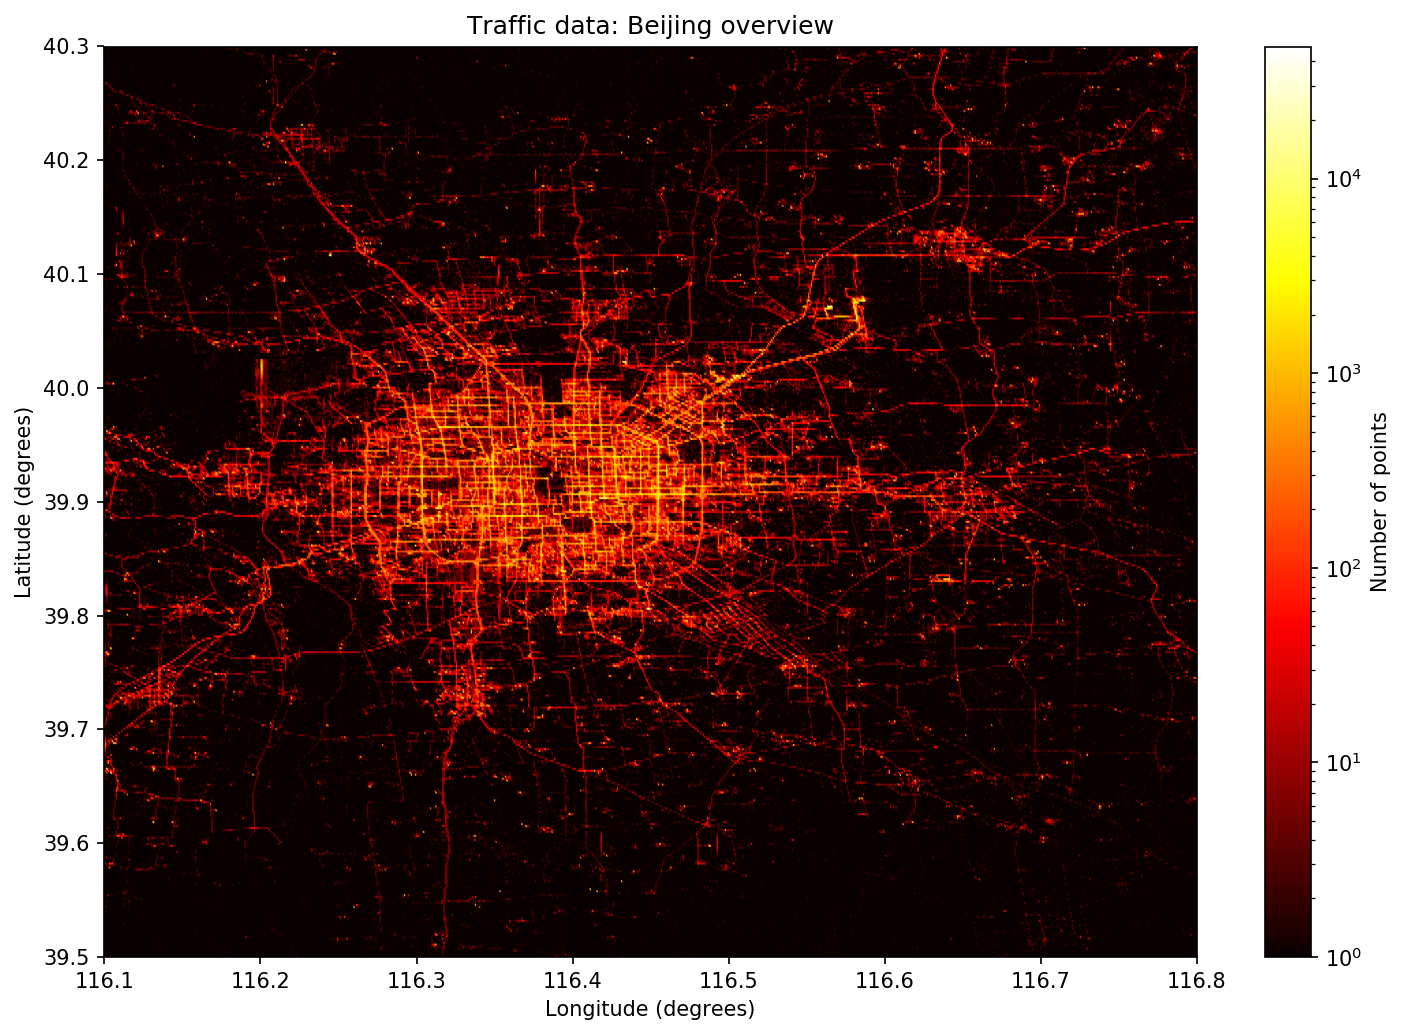

In [7]:

#%% Plot position density -- Overview 

print("Plotting position density...")
xmin, xmax = 116.1, 116.8
ymin, ymax = 39.5, 40.3

window = data[(xmin < data.longitude) & (data.longitude < xmax) & \
            (ymin < data.latitude) & ( data.latitude < ymax)]

x = np.array(window.longitude)
y = np.array(window.latitude)

plt.figure(figsize = (10,7), dpi=150)
plt.hexbin(x,y,bins='log', gridsize=800, cmap=plt.cm.hot)   # black -> red > white
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Traffic data: Beijing overview")
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')

cb = plt.colorbar()
cb.set_label('Number of points')

plt.tight_layout()
plt.show()